In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import langevin

In [2]:
# here we define the values of the physical parameters
# all energies are in kT = 4e-21J and lengths are in micrometers
# kappa = 10kT, sigma = 0.5 microJ/m^2, gamma = 0.1MJ/m^4, eta = 1.0mPa s
kappa = 10
sigma = 125
ga = 25
eta= 0.25
qmin=np.sqrt(3)/10

Here we describe the system in a continuous way

In [3]:
def gamma(q, kappa=kappa, sigma=sigma, ga=ga, eta=eta ):
    return (kappa*q**4+sigma*q**2+ga)/(4*eta*q)

In [4]:
def avg(q,resolution):
    return (np.exp(-gamma(q)*resolution)-1.0+gamma(q)*resolution)/(gamma(q)**2*resolution**2)

In [5]:
def integrant(q,t):
    return q*np.exp(-gamma(q)*t)/(kappa*q**4+sigma*q**2+ga)*avg(q,1e-6)*np.exp(-0.25*0.5**2*q**2)

In [6]:
time=np.logspace(-5,0,50)

In [7]:
acf=[quad(integrant,qmin,np.inf,args=(t))[0] for t in time]

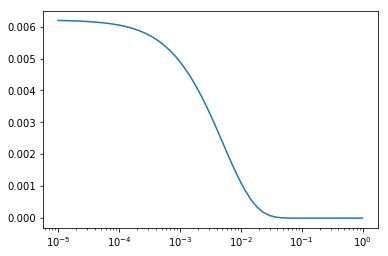

In [8]:
plt.semilogx(time,acf)

lets try the descrete one.  Here we assume that we have a $q_{min}$ and that $q^2=q_{x}^2+q_{y}^2$ where each $q_{x}=lq_{min}$ and $q_{y}=mq_{min}$ which results in $q_{lm}=q_{min}\sqrt{l^2+m^2}$

In [9]:
q_list=[np.sqrt(l**2+m**2) for l in range(0,3) for m in range(0,3)]

In [10]:
q_list=np.array(sorted(q_list)[1:])
print(q_list.size)
print(q_list)

8
[ 1.          1.          1.41421356  2.          2.          2.23606798
  2.23606798  2.82842712]


In [11]:
def corrfct(t,q_list):
    corr=np.exp(-gamma(q_list)*t)/(kappa*q_list**4+sigma*q_list**2+ga)*avg(q_list,1e-6)*np.exp(-0.25*0.5**2*q_list**2)
    return corr.sum()

In [12]:
acf_d = np.array([corrfct(t,q_list) for t in time])

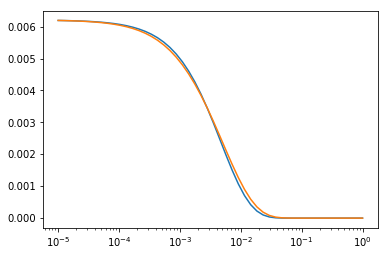

In [13]:
# plot correlation functions and normalize them to the same msd
plt.semilogx(time,acf_d*acf[0]/acf_d[0])
plt.semilogx(time,acf)

In [21]:
ts_all = None
for q in q_list:
    ts = langevin.time_series2(1/(kappa*q**4+sigma*q**2+ga),gamma(q),0.00001,10000)
    if ts_all is None:
        ts_all = ts
    else:
        ts_all = ts_avg + ts



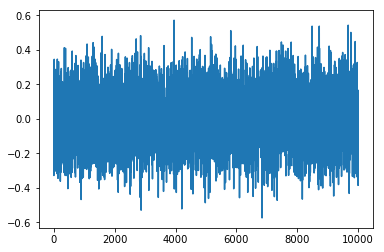

In [22]:
plt.plot(ts_all)

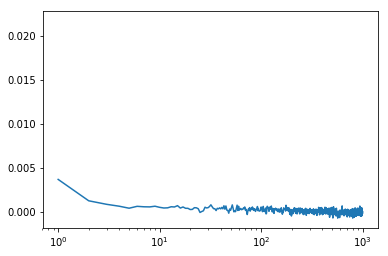

In [24]:
N = ts_all.size
# calculate autocorrelation function
f = np.fft.rfft(ts_all)
acf = np.fft.irfft(f * np.conjugate(f))
acf = np.fft.fftshift(acf) / N
autocorr = acf[int(N / 2):]

plt.semilogx(autocorr[:1000])